# Introduction to Data Science - Homework 3 (2023)
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 3, 11:59pm.

In this homework you will read in and analyze a movies dataset. First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 


## Your Data
Fill out the following information: 

*First Name:* Melissa   
*Last Name:* Frisby   
*E-mail:* u1175875@utah.edu   
*UID:* u1175875  


In [1]:
# imports
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Part 1: Analyzing Data The Hard Way

In this part we'll do some manual analysis of a movies dataset.

### Task 1.1: Read in the data

Parse the file [movies.csv](movies.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 might be a good inspiration for this. 

We recommend that you store the header in a separate array. Make sure that at least the "ratings" and the "votes" columns are cast to the appropriate data types for doing calculations with them. 

Print the header, the number of rows and columns, and Row 50 of the table.

In [2]:
# initialize the top-level array
movies = []
header = []
with open('movies.csv') as csvfile:
    filereader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in filereader:
        movies.append(row)

# Store the header in a separate array
header = movies.pop(0)

# convert numbers to floats or ints for ranks
for row in movies:
    row[0] = int(row[0])
    row[2] = int(row[2])
    row[3] = float(row[3])
    if row[4] == 'NA':
        row[4] = 0
    else:
        row[4] = float(row[4])
    row[5] = float(row[5])
    row[6] = float(row[6])


# print header, rows and cols, and row 50
print(header)
print(len(movies))
print(len(header))
print(movies[49][:])

['', 'title', 'year', 'length', 'budget', 'rating', 'votes', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa', 'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short']
58788
25
[50, "'What's Your 'I.Q.'?' Number Two", 1940, 9.0, 0, 5.9, 9.0, '0', '0', '14.5', '14.5', '24.5', '24.5', '14.5', '0', '14.5', '14.5', '', '0', '0', '0', '0', '1', '0', '1']


### Task 1.2:  Calculate movie stats

In this task, you will calculate some statistics about movies. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell – you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calculate average number of votes
Compute the average number of votes for the movies and print the output. Also print the number of movies.
Your output could look like this:
    
    Average number of votes: xxx.xxxx, Number of movies: xx

#### Task 1.2.2: Calculate average rating for minor movies

Compute the average rating for the movies that have less than 400 votes in your loaded dataset and print the output. (We'll call these movies with less than 400 votes *minor movies* from now on).

Your output could look like this:
    
    Average rating of movies with less than 400 votes: xxx.xxxx, Number of minor movies: xx

#### Task 1.2.3: Find the highest and the lowest rated minor movies

Find out which of the movie with less than 400 votes has the highest rating, and which of the movie with less than 400 votes has the lowest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: MOVIE TITLE
    Lowest rating: xxx.xxxx, Title: MOVIE TITLE
 
#### Task 1.2.4: Interpret the data
 * What's the size relationship of minor movies to all movies?
 * Are minor movies usually worse than the average movies?

In [3]:
rating = []
votes = []
minor_movies = []
for row in movies:
    votes.append(row[6])
    rating.append(row[5])
    if row[6] < 400:
        minor_movies.append(row)
            
avg_votes = sum(votes)/len(votes)
minor_rating = [row[5] for row in minor_movies]
avg_rat_minor = sum(minor_rating)/len(minor_rating)
high_rat = max(minor_rating)
high_rat_ind = np.argmax(minor_rating)
low_rat = min(minor_rating)
low_rat_ind = np.argmin(minor_rating)
print('Average number of votes: ', str(avg_votes), ', Number of movies: ', str(len(movies)))
print('Average rating of movies with less that 400 votes: ', str(avg_rat_minor),
      ', Number of minor movies: ', str(len(minor_movies)))
print('Highest rating: ', str(high_rat), ', Title: ', str(minor_movies[high_rat_ind][1]))
print('Lowest rating: ', str(low_rat), ', Title: ', str(minor_movies[low_rat_ind][1]))

Average number of votes:  632.1303837517861 , Number of movies:  58788
Average rating of movies with less that 400 votes:  5.874335114133126 , Number of minor movies:  51475
Highest rating:  10.0 , Title:  Dimensia Minds Trilogy: The Hope Factor
Lowest rating:  1.0 , Title:  20/20 Vision


**Your Interpretation**: There are significantly more minor movies than large movies, with 87.6% of movies being considered minor movies. There is no difference in rank high or low, so minor movies are probably just as likely to have a high or low rating compared to larger movies.

## Part 2: Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset. 
 * How many data rows did you load? How many columns?
 * Of which data types are the columns? 
 * Do you have to do manual data type conversions?

In [4]:
movies_pd = pd.read_csv('movies.csv')
print(movies_pd.head())
print(movies_pd.shape)
print(movies_pd.dtypes)

   Unnamed: 0                     title  year  length  budget  rating  votes  \
0           1                         $  1971     121     NaN     6.4    348   
1           2         $1000 a Touchdown  1939      71     NaN     6.0     20   
2           3    $21 a Day Once a Month  1941       7     NaN     8.2      5   
3           4                   $40,000  1996      70     NaN     8.2      6   
4           5  $50,000 Climax Show, The  1975      71     NaN     3.4     17   

     r1    r2   r3  ...    r9   r10  mpaa  Action  Animation  Comedy  Drama  \
0   4.5   4.5  4.5  ...   4.5   4.5   NaN       0          0       1      1   
1   0.0  14.5  4.5  ...   4.5  14.5   NaN       0          0       1      0   
2   0.0   0.0  0.0  ...  24.5  24.5   NaN       0          1       0      0   
3  14.5   0.0  0.0  ...  34.5  45.5   NaN       0          0       1      0   
4  24.5   4.5  0.0  ...   0.0  24.5   NaN       0          0       0      0   

  Documentary  Romance  Short  
0           

**Your Interpretation**: There are 58788 movies and 25 columns they are contained in. The data types vary from int64, object, and float64, but I will not have to do manual conversions.

### Task 2.2: Calculate the average number of votes

Compute the average number of votes for all movies and print the output in a formatted way.

Your output could look like this:
    
    Average number of votes: xxx.xxxx

In [5]:
avg_votes_pd = np.mean(movies_pd['votes'])
print('Average number of votes: ', str(avg_votes_pd))

Average number of votes:  632.1303837517861


### Task 2.3: Compare the runtime

We want to measure the runtime of the mean calculation using [Pandas](http://pandas.pydata.org/pandas-docs/stable) and compare it to the computation time for calculating the mean using a for loop (you can copy the relevant parts from Task 1). However, since this dataset still not very large, run the mean calculations 300 times in a loop and measure that. 

You can use [time.process_time()](https://docs.python.org/3/library/time.html#time.process_time) to set timestamps before and after the execution of the code you want to measure, then you simply subtract end time from start time.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines. 

E.g.:  
    time using own code: xxx.xxx s  
    time using Pandas: xxx.xxx s  
    difference factor: xxx
    
Interpret the results. Is this difference substantial?     

In [10]:
import time
# your code goes here
start_loop = time.process_time()
for x in range(0,300):
    votes_loop = []
    for row in movies:
        votes_loop.append(row[6])            
    avg_votes = sum(votes)/len(votes)
end_loop = time.process_time()

start_pd = time.process_time()
for x in range(0,300):
    avg_votes_pd = np.mean(movies_pd['votes'])
end_pd = time.process_time()

code = end_loop - start_loop
pand = end_pd - start_pd
diff = code/pand
print('Time using own code: ', str(code), 's')
print('Time using pandas: ', str(pand), 's')
print('Difference: ', str(diff))

Time using own code:  2.6875 s
Time using pandas:  0.03125 s
Difference:  86.0


**Your Interpretation**: The code takes 50 to 100 times longer to run than pandas.

### Task 2.4: Filter out Rows

The whole movies dataset has about 60k entries. Use pandas to filter your dataframe to contain only the minor movies with less than 400 votes.

Count and print the number of movies with less than 400 votes. 

E.g.:
    xxx.xxx movies have less than 400 votes.

In [14]:
mask = movies_pd['votes'] < 400
minor_movies_pd = movies_pd.loc[mask]
print(str(len(minor_movies_pd)), 'movies have less than 400 votes')

51475 movies have less than 400 votes


### Task 2.5: Calculate the average rating for minor movies

Compute the average rating for the minor movies.
Your output could look like this:
    
    Average rating of minor movies: xxx.xxxx

In [15]:
avg_min_rat = np.mean(minor_movies_pd['rating'])
print('Average rating of minor movies: ', str(avg_min_rat))

Average rating of minor movies:  5.874335114133126


### Task 2.6: Find the highest and lowest rated minor movies

Find the highest rated minor movie and the lowest minor movie in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) and [idxmin()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmin.html) could be helpful, or you could sort by rating and retrieve the first element. 

Print the title and the rating.

Your output could look like this:
    
    Highest rated movie: TITLE, rating: x.x
    Lowest rated movie: TITLE, rating: x.x

In [21]:
high_rat_pd = np.max(minor_movies_pd['rating'])
high_rat_ind_pd = pd.Series.idxmax(minor_movies_pd['rating'])
low_rat_pd = np.min(minor_movies_pd['rating'])
low_rat_ind_pd = pd.Series.idxmin(minor_movies_pd['rating'])
print('Highest rated movie: ', str(minor_movies_pd.iloc[high_rat_ind_pd][1]), ', Rating: ', str(high_rat_pd))
print('Lowest rated movie: ', str(minor_movies_pd.iloc[low_rat_ind_pd][1]), ', Rating: ', str(low_rat_pd))

Highest rated movie:  Encadenada, La , Rating:  10.0
Lowest rated movie:  24fps , Rating:  1.0


### Task 2.7: Filter out rows and count specific features

From the minor movies you filtered out in a previous task, find out 
 * How many are action.
 * How many are animation.
 * How many are both, action and animation.
 
Create new dataframed for each of these subsets.

Hint: you can combine broadcasting statements with a boolean and using the `&` operator.

Print the results, e.g.:  

    xxx.xxx minor movies are action.
    xxx.xxx minor movies are animation.
    xxx.xxx minor movies are both, action and animation.

In [31]:
action = minor_movies_pd['Action'] > 0
animation = minor_movies_pd['Animation'] > 0
both = action & animation
print(str(sum(action)), 'minor movies are action')
print(str(sum(animation)), 'minor movies are animation')
print(str(sum(both)), 'minor movies are both, action and animation')

3455 minor movies are action
3491 minor movies are animation
50 minor movies are both, action and animation


### Task 2.8: Compare ratings of different categories

Now we want to compare the ratings for action and animation for minor movies.

Compute the average rating, maximum rating, minimum rating, standard deviation, and the median for each category. Hint: there is a function that does all of this in one line. 

What do these numbers tell us? Provide an interpretation.

In [36]:
stats_act = minor_movies_pd['rating'].loc[action].describe()
stats_anim = minor_movies_pd['rating'].loc[animation].describe()
print(stats_act)
print()
print(stats_anim)

count    3455.000000
mean        5.065586
std         1.587671
min         1.000000
25%         3.900000
50%         5.000000
75%         6.200000
max         9.800000
Name: rating, dtype: float64

count    3491.000000
mean        6.570266
std         1.173198
min         1.000000
25%         5.900000
50%         6.700000
75%         7.300000
max         9.800000
Name: rating, dtype: float64


**Your Interpretation**: These statistics tell us that the average rating of animated movies is higher than the average rating of action movies, but they have the same max and min ratings.

### Task 2.9: Movies per year

Calcluate how many minor movies in this dataset were made in each year.

Print the number like this, sorted by year:

    year   number of movies
    1902    xxx
    1903    xxx
    ...     ...

Use this data to render a line chart of the number of movies per year.

In [66]:
# your code goes here
yearly = minor_movies_pd['year'].value_counts()
print(yearly)

2003    1844
2002    1811
2001    1784
2000    1719
2004    1693
        ... 
1894       9
1902       8
1898       5
1895       3
1893       1
Name: year, Length: 113, dtype: int64


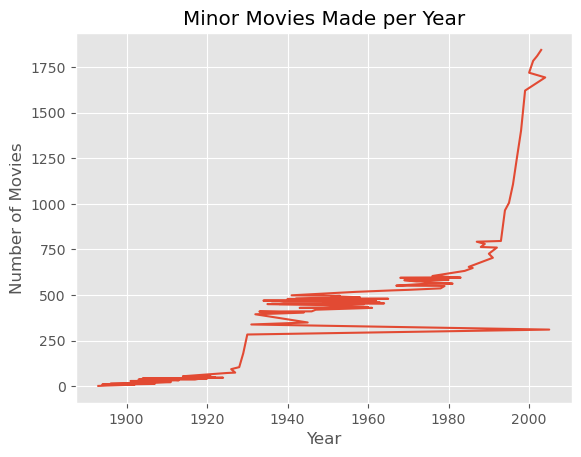

In [81]:
# create the plot here
yearly.plot()
plt.title('Minor Movies Made per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

### Task 2.10: Yearly average

Compute the average number of votes per year for all minor movies.  
Use the numbers you computed to plot a line chart. Plot the year on the x-axis and the average rating on th y axis.  

In [119]:
votes_year = minor_movies_pd.groupby('year')
num_votes_total = votes_year.sum()
count_votes = votes_year.value_counts()
avg = []
for year in votes_year:
    

year
1893        90
1894       308
1895       109
1896       589
1897       305
         ...  
2001    105429
2002    102462
2003     89867
2004     76519
2005     12335
Name: votes, Length: 113, dtype: int64

### Task 2.11: Explore and Interpret

Are old movies better? How could you explain this? 

Are there differences between the rating of minor movies and all movies over time? 

Continue to explore and use plots to inform your answer. Interesting measures to consider are the total number of votes per year, the average number of votes for a movie in a particular year, etc. 

**Your interpretation**: TODO